# Regresión Lineal - Recargado

Los modelos lineales suelen ser un buen punto de partida para entrenar un modelo. Sin embargo, muchos conjuntos de datos no exhiben relaciones lineales entre las variables independientes y dependientes. Como resultado, con frecuencia es necesario crear un modelo polinomial. Sin embargo, estos modelos suelen ser propensos al sobreajuste. Un método para reducir el sobreajuste en modelos polinomiales es mediante el uso de la regularización.

**Nota:** Tener en cuenta que en *regresión lineal*, buscabamos la combinación de m y de b, que genere aquella línea que mayor aproximación a los datos tiene; donde es menor la distancia entre los datos reales y los datos predichos (o recta teórica que estamos construyendo).

En este notebook pondrás en práctica la aplicación de modelos de regresión lineal a problemas no lineales. También incroporarás la técnica de regularización para evitar el overfitting, un problema común en este tipo de enfoques.

## 1. Regresión No-Lineal

Vamos a comenzar, como siempre hacemos en estos temas, con un ejemplo controlado. Supongamos que tenenos un dataset con dos atributos, $x$ e $y$, y la relación entre ellos es $y = -2x^4+3x^2+1$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

La siguiente celda genera nuestro dataset sintético. Le sumamos ruido para simular una situación más realista.

In [2]:
n = 300
x = np.linspace(-1,1,n)
# En `x`, lo que hicimos fue "Estandarizar nuestros datos#.
# Ésto reduce nuestros datos a un rango entre 0 y 1.
# Tiene el propósito de permitirnos trabajar con números razonables cuando subimos a una potencia.

y_real = -1.5*x**4+3*x**2+1 # Preguntar si es -2
y = y_real + 0.1*np.random.randn(n)

Graficamos la muestra y la curva teórica.

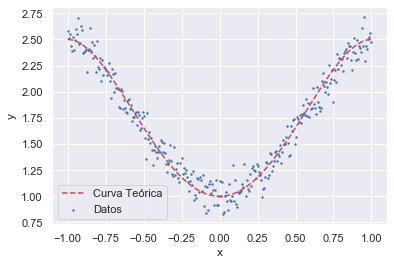

In [3]:
plt.scatter(x,y, s = 2, label = 'Datos')
plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Vamos a entrenar un modelo de Regresión Lineal, al que llamaremos `reg_1`. Primero, vamos a definir nuestro dataset `X` (notar la diferencia con la variable `x`)- Luego, hacer un `train_test_split`, y entrenar la regresión lineal.

In [4]:
from sklearn.model_selection import train_test_split
X = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
reg_1 = LinearRegression()

In [6]:
reg_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_train_pred_1 = reg_1.predict(X_train)
y_test_pred_1 = reg_1.predict(X_test)

Graficamos la regresión obtenida.

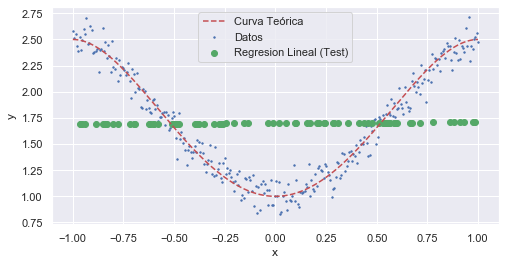

In [8]:
plt.figure(figsize = (8,4))
plt.scatter(x,y, s = 2, label = 'Datos')
plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')
plt.scatter(X_test,y_test_pred_1,label ='Regresion Lineal (Test)', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Ya en el gráfico podemos ver que la regresión obtenida es un modelo malo, ya que no captura correctamente la relación entre $x$ e $y$, salvo por, prácticamente, su valor medio.

De todas formas, calculamos el error RMSE, hacemos un histograma de los errores en el conjunto de Train y Test, y una curva `y` vs `y_pred`

Raíz del error cuadrático medio en Train: 0.5300877528361424
Raíz del error cuadrático medio en Test: 0.4967237279322025


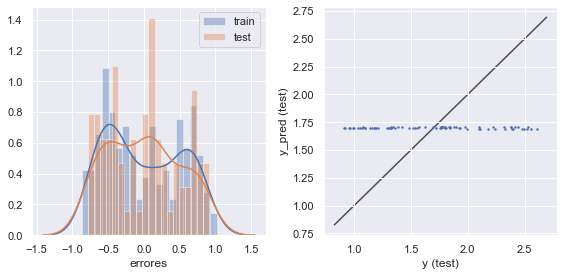

In [9]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_1))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_1, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_1, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_1, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

Tal cómo sucedió en ejemplo de la bitácora, el modelo parece muy lejos de la realidad. Veamos si lo podemos mejorar.

Para facilitar la comprensión del código, vamos a crear una función que nos sirva para evaluar modelos de regresión.

In [10]:
def evaluar_regresion(model,x,y, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (12,4))
    plt.subplot(1,3,1)
    plt.scatter(x,y, s = 2, label = 'Datos')
    plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')
    
    list1, list2 = zip(*sorted(zip(X_train[:,0], y_train_pred)))
    plt.plot(list1, list2,label ='Regresión (train)')
    
    list1, list2 = zip(*sorted(zip(X_test[:,0], y_test_pred)))
    plt.plot(list1, list2,label = 'Regresión (test)')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()


    plt.subplot(1,3,2)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,3,3)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

### 1.2 Atributos Polinómicos


Vamos a agregar al dataset, `X`, nuevos atributos polinómicos: $x^2, x^3$ y $x^4$  y volver a ajustar la regresión lineal.

Cada atributo lo vamos a agregar de a uno, y vamos a ver cómo se modifica la regresión. **Presta mucha atención al código**. Al agregar un atributo nuevo, ¿qué ocurría con la regresíon lineal?

0
1
REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 1
Agregamos atributos hasta la potencia x**1
[[-0.99331104]
 [-0.98662207]
 [-0.97993311]
 [-0.97324415]
 [-0.96655518]
 [-0.95986622]
 [-0.95317726]
 [-0.94648829]
 [-0.93979933]]
Los atributos tienen forma: (300, 1)
Raíz del error cuadrático medio en Train: 0.5300877528361424
Raíz del error cuadrático medio en Test: 0.4967237279322025


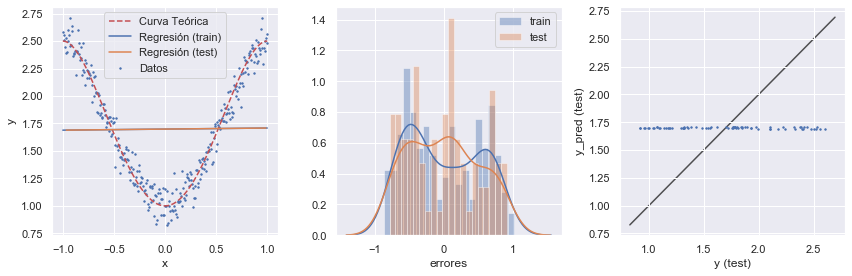

1
2
REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 2
Agregamos atributos hasta la potencia x**2
[[-0.99331104]
 [-0.98662207]
 [-0.97993311]
 [-0.97324415]
 [-0.96655518]
 [-0.95986622]
 [-0.95317726]
 [-0.94648829]
 [-0.93979933]]
[[-0.99331104  0.98666682]
 [-0.98662207  0.97342312]
 [-0.97993311  0.9602689 ]
 [-0.97324415  0.94720417]
 [-0.96655518  0.93422892]
 [-0.95986622  0.92134316]
 [-0.95317726  0.90854688]
 [-0.94648829  0.89584009]
 [-0.93979933  0.88322278]]
Los atributos tienen forma: (300, 2)
Raíz del error cuadrático medio en Train: 0.1374243417452407
Raíz del error cuadrático medio en Test: 0.1452407479869535


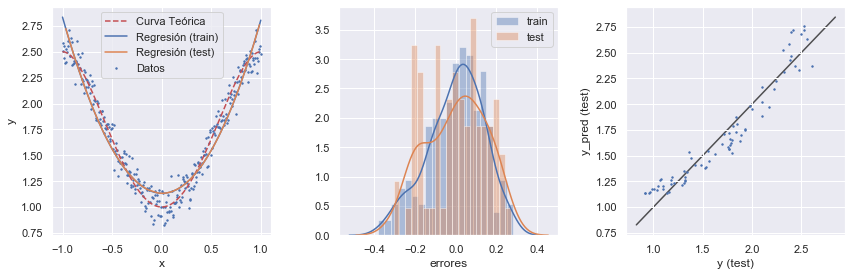

2
3
REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 3
Agregamos atributos hasta la potencia x**3
[[-0.99331104]
 [-0.98662207]
 [-0.97993311]
 [-0.97324415]
 [-0.96655518]
 [-0.95986622]
 [-0.95317726]
 [-0.94648829]
 [-0.93979933]]
[[-0.99331104  0.98666682]
 [-0.98662207  0.97342312]
 [-0.97993311  0.9602689 ]
 [-0.97324415  0.94720417]
 [-0.96655518  0.93422892]
 [-0.95986622  0.92134316]
 [-0.95317726  0.90854688]
 [-0.94648829  0.89584009]
 [-0.93979933  0.88322278]]
[[-0.99331104  0.98666682 -0.98006704]
 [-0.98662207  0.97342312 -0.96040073]
 [-0.97993311  0.9602689  -0.94099929]
 [-0.97324415  0.94720417 -0.92186091]
 [-0.96655518  0.93422892 -0.90298381]
 [-0.95986622  0.92134316 -0.88436618]
 [-0.95317726  0.90854688 -0.86600623]
 [-0.94648829  0.89584009 -0.84790216]
 [-0.93979933  0.88322278 -0.83005218]]
Los atributos tienen forma: (300, 3)
Raíz del error cuadrático medio en Train: 0.13742225764920363
Raíz del error cuadrático medio en Test: 0.14529034801181887


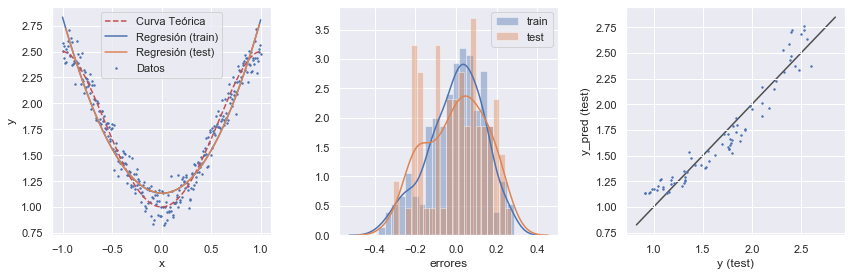

3
4
REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 4
Agregamos atributos hasta la potencia x**4
[[-0.99331104]
 [-0.98662207]
 [-0.97993311]
 [-0.97324415]
 [-0.96655518]
 [-0.95986622]
 [-0.95317726]
 [-0.94648829]
 [-0.93979933]]
[[-0.99331104  0.98666682]
 [-0.98662207  0.97342312]
 [-0.97993311  0.9602689 ]
 [-0.97324415  0.94720417]
 [-0.96655518  0.93422892]
 [-0.95986622  0.92134316]
 [-0.95317726  0.90854688]
 [-0.94648829  0.89584009]
 [-0.93979933  0.88322278]]
[[-0.99331104  0.98666682 -0.98006704]
 [-0.98662207  0.97342312 -0.96040073]
 [-0.97993311  0.9602689  -0.94099929]
 [-0.97324415  0.94720417 -0.92186091]
 [-0.96655518  0.93422892 -0.90298381]
 [-0.95986622  0.92134316 -0.88436618]
 [-0.95317726  0.90854688 -0.86600623]
 [-0.94648829  0.89584009 -0.84790216]
 [-0.93979933  0.88322278 -0.83005218]]
[[-0.99331104  0.98666682 -0.98006704  0.97351141]
 [-0.98662207  0.97342312 -0.96040073  0.94755256]
 [-0.97993311  0.9602689  -0.94099929  0.92211636]
 [-0.97324415  0.947204

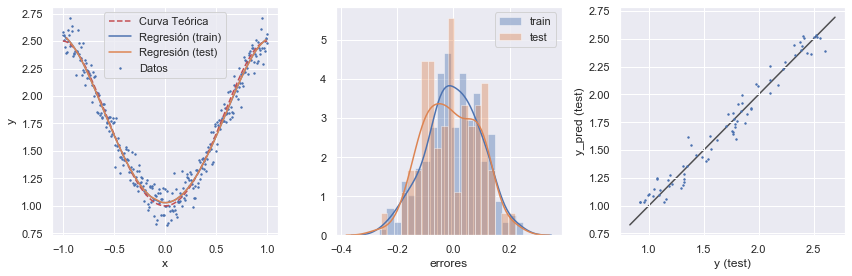

4
5
REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 5
Agregamos atributos hasta la potencia x**5
[[-0.99331104]
 [-0.98662207]
 [-0.97993311]
 [-0.97324415]
 [-0.96655518]
 [-0.95986622]
 [-0.95317726]
 [-0.94648829]
 [-0.93979933]]
[[-0.99331104  0.98666682]
 [-0.98662207  0.97342312]
 [-0.97993311  0.9602689 ]
 [-0.97324415  0.94720417]
 [-0.96655518  0.93422892]
 [-0.95986622  0.92134316]
 [-0.95317726  0.90854688]
 [-0.94648829  0.89584009]
 [-0.93979933  0.88322278]]
[[-0.99331104  0.98666682 -0.98006704]
 [-0.98662207  0.97342312 -0.96040073]
 [-0.97993311  0.9602689  -0.94099929]
 [-0.97324415  0.94720417 -0.92186091]
 [-0.96655518  0.93422892 -0.90298381]
 [-0.95986622  0.92134316 -0.88436618]
 [-0.95317726  0.90854688 -0.86600623]
 [-0.94648829  0.89584009 -0.84790216]
 [-0.93979933  0.88322278 -0.83005218]]
[[-0.99331104  0.98666682 -0.98006704  0.97351141]
 [-0.98662207  0.97342312 -0.96040073  0.94755256]
 [-0.97993311  0.9602689  -0.94099929  0.92211636]
 [-0.97324415  0.947204

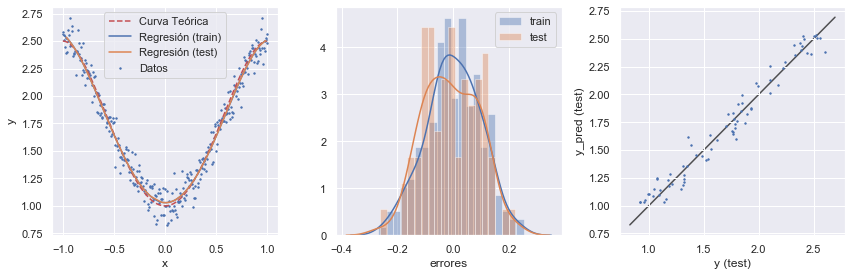

In [11]:
for idx,potencia_maxima in enumerate(range(1,6)):
    print(idx)
    print(potencia_maxima)
    print(f'REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO {idx + 1}')
    print(f'Agregamos atributos hasta la potencia x**{potencia_maxima}')
    
    X = x.reshape(-1,1)
    print(X[1:10])
    for potencia in range(2,potencia_maxima+1):
        X = np.hstack((X,(x**potencia).reshape(-1,1)))
        print(X[1:10])
    print(f'Los atributos tienen forma: {X.shape}')
        
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)
    
    ### ENTRENAMOS
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    
    ### COMPLETAR AQUI PARA RESOLVER CHALLENGE
    
    evaluar_regresion(reg, x,y, X_train, X_test, y_train, y_test)


Una aclaración sobre el código: es una buena práctica estandarizar los datos (normalizar) antes de entrenar una regresión lineal. No lo hicimos para no saturar (aún más) la explicación.


**Para Pensar - Challenge**

1. ¿Por que no parecen haber cambios entre el segundo y el tercer gráfico?¿Y entre el cuarto y el quinto?
* A medida que vamos aumentando las potencias, el gráfico va mostrando un mayor ajuste respecto a la curva teórica, hasta alcanzar un sobreajuste. En el cuarto y quinto se ve un sobreajuste ya que se aprendió todos los datos y por eso son similares. El RMSE es mínimo.
* Las gráficas 2 y 3, 4 y 5, se parecen: las pendientes de la función elevada a la 2 y elevada a la 4 van a tener mayor peso, mientras que las de la función elevada a la 3 y a la 5, menos peso, porque sus pendientes son cercanas a 0, generando que los primeros atributos se cancelen.
* Viendo los parámetros que el modelo generó (VER MIN 21.20 PARA COMPLETAR LA ORACIÓN). 
2. Modifica el código de forma tal que imprima los coeficientes (pendientes y ordenada al origen) de cada regresión entrenada.
* Hecho en el punto anterior con los `print`.
3. Agrega atributos de orden polinómico más alto y observa qué sucede. **Nota:** la modificación que tienes que hacer en el código es mínima. No tengas miedo de probar diferentes órdenes de magnitud.

Raíz del error cuadrático medio en Train: 0.088140812308124
Raíz del error cuadrático medio en Test: 12364.251019190338


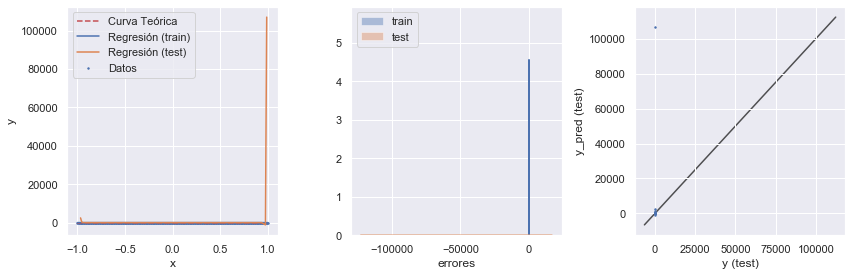

In [12]:
for idx,potencia_maxima in enumerate(range(259,260)):
        
    X = x.reshape(-1,1)
    for potencia in range(2,potencia_maxima+1):
        X = np.hstack((X,(x**potencia).reshape(-1,1)))
                
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)
    
    ### ENTRENAMOS
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    
    ### COMPLETAR AQUI PARA RESOLVER CHALLENGE
    
    evaluar_regresion(reg, x,y, X_train, X_test, y_train, y_test)

* Como se observa en el Gráfico 2, no pudo predecir. Hay Overfiting.
* Es por ello que el RMSE del Train es tan bajo, y el del Test es tan alto.

## 2. `PolynomialFeatures`

En la práctica, no deberás agregar atributos polinómicos como hicimos en el ejemplo anterior, sino que podrás usar la clase `PolynomialFeatures` de Scikit-Learn. Lee atentamente su documentación y aplícala en el mismo problema de la sección 1. Nosotros te guiamos en los pasos, pero si crees que no lo necesitas, puedes hacerlo en un notebook aparte o borrar las celdas con indicaciones.

**Atención:** Recordá que en estos ejercicios conocemos la forma real de los datos (el polinomio) porque los generamos nosotros. En la realidad no lo vas a conocer, por lo que el grado máximo a incoporar es un hiperparámetro.

1. Importa la clase `PolynomialFeatures`.

In [13]:
from sklearn.preprocessing import PolynomialFeatures

2. Vuelve a definir `X` a partir de `x`, y haz un `train_test_split`.

In [14]:
X = x.reshape(-1,1) # lo convertimos en un vector columna
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

3. Crea un objeto a partir de `PolynomialFeatures` de suficiente `degree` para este problema. Aplícalo sobre `X_train` e `X_test`. Imprime en pantalla el `shape` de los nuevos conjuntos obtenidos.

In [15]:
print (X_train[:10])
print (X_test[:10])
# Atributo original: corresponde a una sola columna

poly = PolynomialFeatures (7, include_bias = False) # Preprocesamiento, de "Grado 7" // Que no carge el corte con eje y (+b)
X_train_new = poly.fit_transform(X_train) # Conjunto de datos que incluye los nuevos atributos, las nueva columnas
X_test_new = poly.fit_transform(X_test)

print (X_train_new[:10])
print (X_test_new[:10])
# Ahora son 7 columnas. Son nuevas combinaciones lineales del atributo original
# A la vista, elevó a la 1, a la 2, a la 3, a la 4, a la 5, a la 6, a la 7

print(X_train_new.shape, X_test_new.shape)
print(X_train_new.round(2)[:10])

[[ 0.88628763]
 [-0.45150502]
 [-0.43812709]
 [-0.55852843]
 [ 0.9264214 ]
 [ 0.090301  ]
 [ 0.03010033]
 [-0.8729097 ]
 [-0.17056856]
 [-0.47157191]]
[[ 0.35785953]
 [ 0.77926421]
 [ 0.01672241]
 [-0.93979933]
 [ 0.55852843]
 [ 0.51170569]
 [ 0.31103679]
 [-0.27090301]
 [-0.96655518]
 [ 0.17056856]]
[[ 8.86287625e-01  7.85505755e-01  6.96184030e-01  6.17019291e-01
   5.46856562e-01  4.84672204e-01  4.29558977e-01]
 [-4.51505017e-01  2.03856780e-01 -9.20423589e-02  4.15575868e-02
  -1.87634589e-02  8.47179584e-03 -3.82505832e-03]
 [-4.38127090e-01  1.91955347e-01 -8.41008378e-02  3.68468553e-02
  -1.61436055e-02  7.07295091e-03 -3.09885140e-03]
 [-5.58528428e-01  3.11954005e-01 -1.74235180e-01  9.73153012e-02
  -5.43533622e-02  3.03578980e-02 -1.69557490e-02]
 [ 9.26421405e-01  8.58256619e-01  7.95107303e-01  7.36604424e-01
   6.82406105e-01  6.32195623e-01  5.85679557e-01]
 [ 9.03010033e-02  8.15427121e-03  7.36338871e-04  6.64921389e-05
   6.00430686e-06  5.42194933e-07  4.89607465e-

4. Entrena una regresión lineal, observa los coeficientes obtenidos, y predice sobre el conjunto de Train y de Test.

In [16]:
reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)
print(reg_2.coef_, reg_2.intercept_)
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

[-0.0944567   2.7026368   0.66399695 -1.08473685 -1.36245505 -0.12171629
  0.79412223] 1.031656595787681


5. Calcula el error RMSE sobre cada conjunto, grafica la curva obtenida, el histograma de los errores y la relación $y$ vs. $y_{pred}$ como hicimos en los ejemplos anteriores.

Raíz del error cuadrático medio en Train: 0.0972560237947985
Raíz del error cuadrático medio en Test: 0.09683989493357492


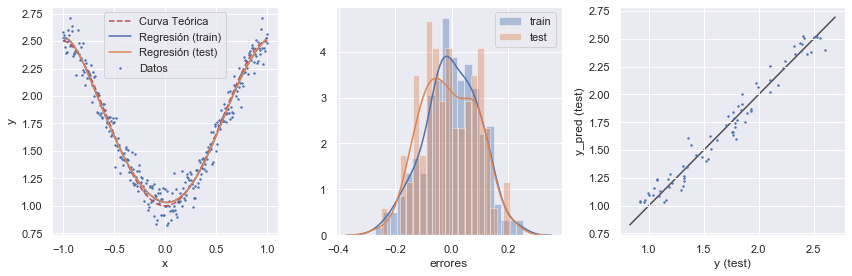

In [17]:
evaluar_regresion(reg_2, x,y, X_train_new, X_test_new, y_train, y_test)
# El evaluar_regresion, quedó definido del challenge anterior

* A mayor grado seleccionado, se tiende a un mayor ajuste.

### 3. Regularización

Esperamos haberte convencido de que crear nuevos atributos funciona. Sin embargo, este ejemplo que te mostramos es demasiado sencillo por varios motivos:
1. La relación entre los atributos y la variable a predecir es un polinomio de grado relativamente bajo. No solo eso, sino que además la conocemos.
2. Solamente contamos con una sola variable predictora, `x`, cuando en realidad podrían ser más de un atributo. Como mencionamos en la bitácora, cuando agreguemos nuevos atributos, no solamente podemos considerar las potencias de cada atributo, sino también las interacciones - cosas de la forma $x_1 x_2$.

No siempre sabremos hasta qué grado generar atributos ni si usar interraciones entre ellos. Es más, no siempre será un polinomio la relación entre $x$ e $y$, muchas veces directamente no tendremos claro qué tipo de relación es.

Por suerte, los polinomios suelen ser una buena aproximación a otras funciones. Si no funciona, **podemos generar atributos que no sean polinómicos**, pero eso es algo que deberás investigar por tu cuenta si alguna vez lo necesitas. Por ahora, **es suficiente que sepas que los atributos polinómicos no son la única opción, pero suelen ser una opción versátil.**

En lo que respecta al grado hasta el cual debemos agregar atributos, existe una técnica que nos permite controlar el error si nos pasamos un poco. Esta técnica se llama **Regularización**, y su alcance es mucho mayor que el aquí expuesto. Veamos cómo funciona.

*La pregunta que debemos hacernos es cuáles de nuestras características son relevantes para nuestro modelo y cuáles no.*

Vamos a usar de referencia el modelo que entrenaste en la sección anterior. Por las dudas, lo vamos a dejar entrenado nuevamente aquí. Es importante que prestes atención a los coeficientes de esta regresión lineal.

Raíz del error cuadrático medio en Train: 0.0972560237947985
Raíz del error cuadrático medio en Test: 0.09683989493357492


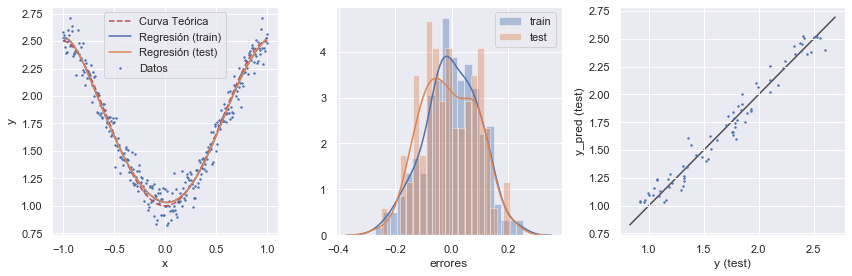

In [18]:
poly = PolynomialFeatures(degree = 7, include_bias=False) ### ACA TENDRAS QUE MODIFICAR MAS ADELANTE
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)

evaluar_regresion(reg_2, x,y, X_train_new, X_test_new, y_train, y_test)

Ahora, vamos a entrenar dos regresiones sobre el mismo dataset, pero con regularización. Esto lo puedes hacer con las clases `Ridge` y `Lasso` de Scikit-Learn. Como siempre, es prácticamente obligatorio que consultes su documentación.

* **Regulación L2 o RIDGE:** Se agrega a la función de Costo, un término proporcional al cuadrado del valor de los coeficientes de peso. La penalización, encoge los coeficientes hacia el Cero.
    * El valor de Alpha, puede ser de 0.1 hasta el valor que se desee.
    * Cuanto mayor sea el valor de alfa, menos varianza exhibirá su modelo y menor será la dispersión de los datos.
* **Regulación L1 o LASSO:** Se agrega a la función de Costo, un término proporcional al valor absoluto de los coeficientes de peso. La penalización, encoge los coeficientes hacia el Cero o convierte a algunos coeficientes en Cero. Así, elimina las características menos importantes en nuestro modelo.
    * El valor de Alpha, puede variar de 0.1 a 1.

Empezamos entrenando el modelo `Ridge`. Presta atención a sus coeficientes:

In [19]:
from sklearn.linear_model import Ridge, Lasso

reg_ridge = Ridge(alpha= 0.1) # Alpha es el PARÁMETRO DE PENALIZACIÓN
reg_ridge.fit(X_train_new,y_train)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [-0.02165451  2.28114628  0.04158084 -0.11215008 -0.06073465 -0.71281343
  0.02029575]
Ordenada: 1.0609975349797311


Raíz del error cuadrático medio en Train: 0.09900300584425342
Raíz del error cuadrático medio en Test: 0.10128229978997773


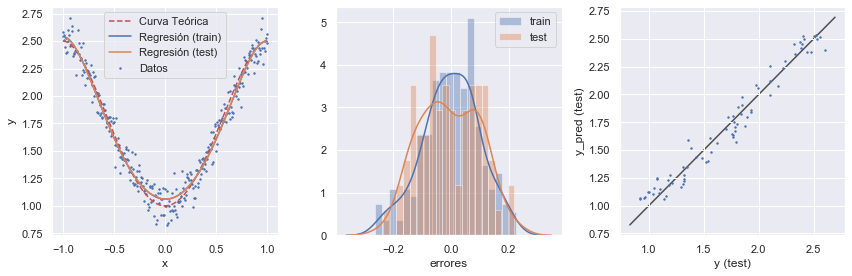

In [20]:
evaluar_regresion(reg_ridge, x,y, X_train_new, X_test_new, y_train, y_test)

**Para Probar:** modifica el valor de `alpha` y observa su efecto. ¿Cómo cambian los coeficientes? **Tip:** varía en órdenes de magnitud,  (10, 5, 1, 0.5, 0.1 ,0.01, 0.005, 0.001, etc.).

Pendientes: [-0.01575859  1.70319173  0.00828927  0.24634192 -0.00531918 -0.43201334
 -0.00336441]
Ordenada: 1.1402319217237382
Raíz del error cuadrático medio en Train: 0.12256010056819495
Raíz del error cuadrático medio en Test: 0.1276316911029593


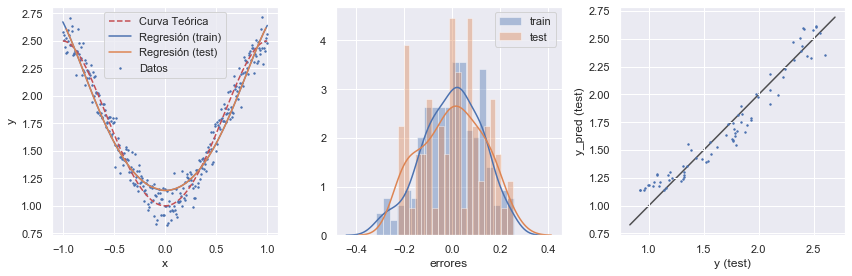

In [21]:
reg_ridge = Ridge(alpha= 1)
reg_ridge.fit(X_train_new,y_train)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

evaluar_regresion(reg_ridge, x,y, X_train_new, X_test_new, y_train, y_test)

Ahora, el modelo `Lasso`:

In [22]:
reg_lasso = Lasso(alpha = 0.001)
reg_lasso.fit(X_train_new,y_train)
print(reg_lasso.coef_, reg_lasso.intercept_)

[-0.01306683  2.20098842 -0.         -0.         -0.         -0.7346133
 -0.        ] 1.0681471560623295


Raíz del error cuadrático medio en Train: 0.10005772091797466
Raíz del error cuadrático medio en Test: 0.10332422957085308


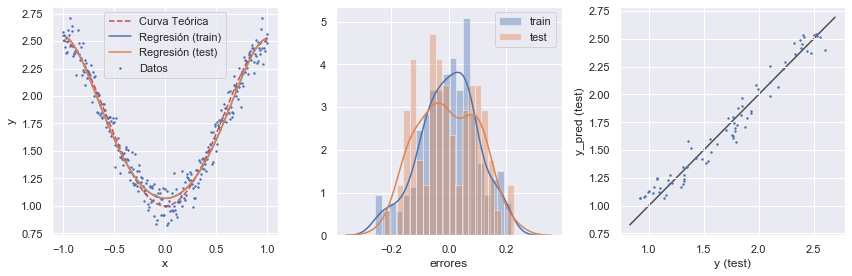

In [23]:
evaluar_regresion(reg_lasso, x,y, X_train_new, X_test_new, y_train, y_test)

**Para Probar:** nuevamente, modifica el valor de `alpha` y observa su efecto. ¿Cómo cambian los coeficientes?¿Notas alguna diferencia con el modelo `Ridge`? ¡Hay una diferencia importante, que hace que la regresión `Lasso` sea muy apreciada!

[0. 0. 0. 0. 0. 0. 0.] 1.698901500293912
Raíz del error cuadrático medio en Train: 0.5301174032581517
Raíz del error cuadrático medio en Test: 0.4960525287166557


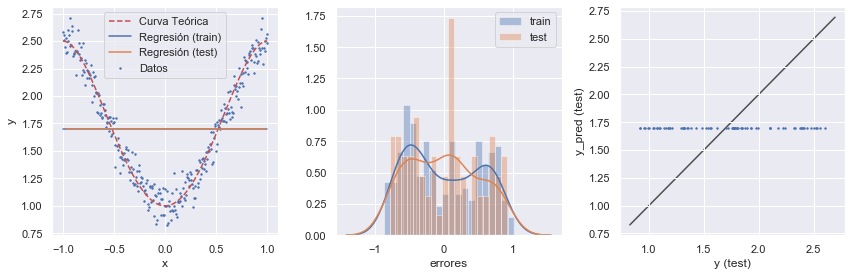

In [24]:
reg_lasso = Lasso(alpha = 1)
reg_lasso.fit(X_train_new,y_train)
print(reg_lasso.coef_, reg_lasso.intercept_)
evaluar_regresion(reg_lasso, x,y, X_train_new, X_test_new, y_train, y_test)

* El modelo `Lasso` es aún mejor que el que entrenamos anteriormente.
* La regularización L1 intenta responder a ésta pregunta reduciendo los valores de ciertos coeficientes a 0. Esto elimina las características menos importantes en nuestro modelo.
* El método de lasso supera la desventaja de la regresión de Ridge no solo castigando los valores altos de los coeficientes β sino que también los pone a cero si no son relevantes. Por lo tanto, puede terminar con menos funciones incluidas en el modelo de las que comenzó, lo cual es una gran ventaja.
* Respecto a las pendientes, en L2 se mantienen cercana a 1, mientras que en L2 se alejan de 1 a medida que crece alpha. Si la ordenada tiene a 0, el atributo x va a tender a 0.  
  
__Más puntos a considerar:__
* `Lasso` tiende a funcionar bien si hay una pequeña cantidad de parámetros significativos y los otros están cerca de cero (ergo: cuando solo unos pocos predictores realmente influyen en la respuesta).
* `Ridge` funciona bien si hay muchos parámetros grandes de aproximadamente el mismo valor (ergo: cuando la mayoría de los predictores impactan la respuesta).

**¿Qué pasa por fuera del rango de entrenamiento?**

Estamos entrenando una regresión en un rango de $x$ entre -1 y 1. ¿Pero qué pasa si entrenamos en ese rango, y queremos ver cómo es la regresión por fuera? Es decir, para valores más grandes y más chicos que -1 y 1, respectivamente.

Vamos a usar los modelos obtenidos para predecir por fuera de ese rango. Por las dudas, **reentrena los modelos `ridge` y `lasso` con valores de `alpha` razonables.** Si tuvieras que apostar, ¿cuál modelo te parece más robusto?

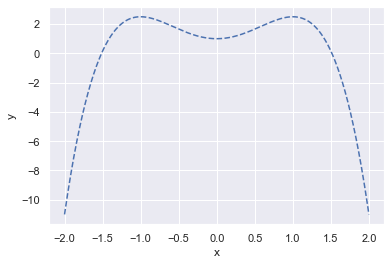

In [25]:
x_nuevo_rango = np.linspace(-2,2,1000)
y_nuevo_rango = -1.5*x_nuevo_rango**4+3*x_nuevo_rango**2+1

plt.plot(x_nuevo_rango, y_nuevo_rango, '--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
X_nuevo_rango = poly.fit_transform(x_nuevo_rango.reshape(-1,1))

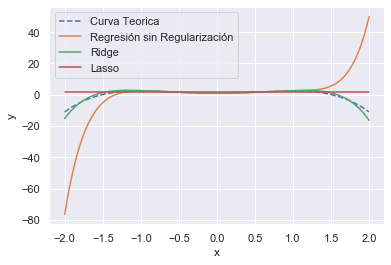

In [27]:
plt.plot(x_nuevo_rango, y_nuevo_rango, '--', label = 'Curva Teorica')
plt.plot(x_nuevo_rango, reg_2.predict(X_nuevo_rango), label = 'Regresión sin Regularización')
plt.plot(x_nuevo_rango, reg_ridge.predict(X_nuevo_rango), label = 'Ridge')
plt.plot(x_nuevo_rango, reg_lasso.predict(X_nuevo_rango), label = 'Lasso')
plt.legend()

### SI NO PUEDE VISUALIZAR CORRECTAMENTE, DESCOMENTA ESTAS LINEAS 
### Y PRUEBA DISTINTOS VALORES PARA LOS LIMITES
# plt.xlim(-2.5,2.5)
# plt.ylim(-10,10)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Tal vez el ejemplo por ahora no te parezca muy impresionante. De alguna forma, todos los modelos dan resultados muy parecidos. Pero recuerda lo siguiente: nosotros sabemos cómo es la relación funcional de los datos, un polinomio de grado 4. Cuando agregamos atributos, lo estamos haciendo hasta grado 7, lo cual no es mucho más grande que el grado original. 

**Para Probar:** Para ver el verdadero efecto de la regularización, agrega atributos polinómicos hasta un grado alto, por ejemplo 50, 100, 150 ó más. Vuelve a correr la regresión sin regularización, y la regresión Ridge y Lasso, y fíjate qué sucede. Tal vez puedes volver a probar con algunos valores nuevos de `alpha`.


## Conclusiones

Es posible ajustar relaciones no-lineales con un modelo lineal, pero tiene un costo: agregar nuevos atributos. Esto no solo hace crecer de manera considerable nuestro dataset, sino que además **introduce un nuevo hiperparámetro, el grado hasta el cual agregamos atributos**. Esto **se soluciona parcialmente con regularización**, pero a costa de otro hiperparámetro, la fuerza de la regularización, $\alpha$. Para colmo, estos hiperparámetros que acabamos de mencionar de alguna forma interactuan: a más atributos agreguemos, $\alpha$ probablemente deba tomar otro valor.

Como si esto no fuera poco, hay que tener mucho cuidado cuando usamos un modelo de regresión entrenado en un rango para predecir por fuera de ese rango. Como verás, las cosas pueden andar muy mal. Por suerte, esto no es un problema en muchas aplicaciones, pero es algo a lo que debes estar atento/a.


## 4. Ejercitación

Si todavía no estás muy cansado/a, puedes intentar hacer algunos de - o todos - los siguientes ejercicios:
1. Experimenta con alguna técnica para visualizar los coeficientes de una regresión, de forma tal de poder observar los efectos de la regularización en ellos.
1. Puedes aplicar lo que vimos hoy en cualquiera de los dos datasets que te dejamos para descargar en la bitácora. Son datasets sintéticos, pero te servirán como práctica más realista de estas herramientas.
1. ¿Recuerdas el Proyecto del Bloque 01? ¡Aplica lo aprendido en ese dataset!